In [ ]:
#calculation code
import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path3d = './p3disof_test01jup/'
path2d = './bae2017_01jup1400x512/'

itime = 100
r0 = 1.0
fargo3d    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path3d)
fargo3d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path3d)
fargo2d    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path2d)
fargo2d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2d)


phi3 = fargo3d.phi
rad3  = fargo3d.r
theta3 = fargo3d.theta
phi2 = fargo2d.phi
rad2  = fargo2d.r
theta2 = fargo2d.theta

rad3d, phi3d, theta3d = (np.meshgrid(rad3, phi3, theta3))
rad2d, phi2d = (np.meshgrid(rad2, phi2))

nx = len(phi3)
ny = len(rad3)
nz = len(theta3)
print('orbit '+ str(itime*10))
#-------------------------3d-------------------------
rho_init   = fargo3d_init.rho[:,:,:]
rho   = fargo3d.rho[:,:,:]
vphi_init   = fargo3d_init.vphi[:,:,:]
vphi   = fargo3d.vphi[:,:,:]
vrad     = fargo3d.vr[:,:,:]
vrad_init = fargo3d_init.vr[:,:,:]
vtheta = fargo3d.vtheta[:,:,:]
vtheta_init = fargo3d_init.vtheta[:,:,:] #all have shape (1399,511,65)
omegap = np.loadtxt(path3d+'planet0.dat')[itime][-1]
vphi += omegap*rad3d

omegapinit = np.loadtxt(path3d+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad3d

dphi = np.abs(phi3d[1:,1:,1:]-phi3d[:-1,:-1,:-1]) 
drad = np.abs(rad3d[1:,1:,1:]-rad3d[:-1,:-1,:-1]) #shape 1399, 511, 65
dtheta = np.abs(theta3d[1:,1:,1:]-theta3d[:-1,:-1,:-1])#
dvphi = vphi[1:,1:,1:]-vphi[:-1,:-1,:-1]
dvtheta = vtheta[1:,1:,1:]-vtheta[:-1,:-1,:-1]
dvrad = vrad[1:,1:,1:]-vrad[:-1,:-1,:-1]

pv_rad = ((1/(rad3d*np.sin(phi3d))[1:,1:,1:])*(((vtheta*np.sin(phi3d))[1:,1:,1:]-(vtheta*np.sin(phi3d))[:-1,:-1,:-1])/dphi - (dvphi/dtheta)))/rho[1:,1:,1:]
pv_phi = ((1/(rad3d)[1:,1:,1:])*((dvrad)/(dtheta*np.sin(phi3d)[1:,1:,1:]) - (((rad3d*vtheta)[1:,1:,1:]-(rad3d*vtheta)[:-1,:-1,:-1])/drad)))/rho[1:,1:,1:]
pv_theta = ((1/rad3d)[1:,1:,1:]*(((rad3d*vphi)[1:,1:,1:]-(rad3d*vphi)[:-1,:-1,:-1])/(drad) - (dvrad/dphi)))/rho[1:,1:,1:]
#------------------------------3d initial conditions--------------------------------------
dvphi_init = vphi_init[1:,1:,1:]-vphi_init[:-1,:-1,:-1]
dvtheta_init = vtheta_init[1:,1:,1:]-vtheta_init[:-1,:-1,:-1]
dvrad_init = vrad_init[1:,1:,1:]-vrad_init[:-1,:-1,:-1]

pv_rad_init = ((1/(rad3d*np.sin(phi3d))[1:,1:,1:])*(((vtheta_init*np.sin(phi3d))[1:,1:,1:]-(vtheta_init*np.sin(phi3d))[:-1,:-1,:-1])/dphi - (dvphi_init/dtheta)))/rho_init[1:,1:,1:]
pv_phi_init = ((1/(rad3d)[1:,1:,1:])*((dvrad_init)/(dtheta*np.sin(phi3d)[1:,1:,1:]) - (((rad3d*vtheta_init)[1:,1:,1:]-(rad3d*vtheta_init)[:-1,:-1,:-1])/drad)))/rho_init[1:,1:,1:]
pv_theta_init = ((1/rad3d)[1:,1:,1:]*(((rad3d*vphi_init)[1:,1:,1:]-(rad3d*vphi_init)[:-1,:-1,:-1])/(drad) - (dvrad_init/dphi)))/rho_init[1:,1:,1:]

#-------------------------------------------2d-------------------------------
rho_init2d   = fargo2d_init.rho
rho2d   = fargo2d.rho
vphi_init2d   = fargo2d_init.vphi
vphi2d   = fargo2d.vphi
vrad2d     = fargo2d.vr
vrad_init2d = fargo2d_init.vr
omegap2d = np.loadtxt(path2d+'planet0.dat')[itime][-1]
vphi2d += omegap2d*rad2d

omegapinit2d = np.loadtxt(path2d+'planet0.dat')[0][-1]
vphi_init2d += omegapinit2d*rad2d

dphi2d = np.abs(phi2d[1:,1:]-phi2d[:-1,:-1]) 
drad2d = np.abs(rad2d[1:,1:]-rad2d[:-1,:-1])
dvphi2d = vphi2d[1:,1:]-vphi2d[:-1,:-1]
dvrad2d = vrad2d[1:,1:]-vrad2d[:-1,:-1]
pv_2d = ((1/rad2d)[1:,1:]*(((rad2d*vphi2d)[1:,1:]-(rad2d*vphi2d)[:-1,:-1])/(drad2d) - (dvrad2d/dphi2d)))/rho2d[1:,1:]
#------------------------------2d initial conditions--------------------------------------
dvphi_init2d = vphi_init2d[1:,1:]-vphi_init2d[:-1,:-1]
dvrad_init2d = vrad_init2d[1:,1:]-vrad_init2d[:-1,:-1]
pv_2d_init = ((1/rad2d)[1:,1:]*(((rad2d*vphi_init2d)[1:,1:]-(rad2d*vphi_init2d)[:-1,:-1])/(drad2d) - (dvrad_init2d/dphi2d)))/rho_init2d[1:,1:]

print('done')

In [17]:
#PV versus R plot
#for integration:
pv_im = 1/(((1/pv_theta[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
pv_im_init = 1/(((1/pv_theta_init[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
#for average:
#pv_im = pv_theta.mean(axis=2)
#pv_im_init = pv_theta_init.mean(axis=2)

plt.plot(fargo3d.r[1:],((pv_im3d-pv_im_init3d)/pv_im_init3d).mean(axis=0), label = '3d_disk')
plt.plot(fargo2d.r[1:],((pv_2d-pv_2d_init)/pv_2d_init).mean(axis=0), label = '2d_disk')
plt.legend()
plt.xlabel('r (au)')
plt.ylabel('Potential Vorticity')
plt.title('Potential Vorticity vs r, 2d-3d comparison for '+str(itime*10)+' orbits')
#plt.ylim(-.5,4)
#plt.xlim(.5,2)
plt.savefig('2d-3dPV_vs_r_'+str(itime*10)+'_orbits.png',dpi=300,bbox_inches='tight')

#r,phi - PV image


fig, ax = plt.subplots(figsize=(8,8))
#for integration:
pv_im = 1/(((1/pv_theta[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
pv_im_init = 1/(((1/pv_theta_init[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
#for average:
#pv_im = pv_theta.mean(axis=2)
#pv_im_init = pv_theta_init.mean(axis=2)
vmin = -1
vmax = 8
levels = np.linspace(vmin,vmax,128)
cp = ax.contourf(fargo3d.r[1:], fargo3d.phi[1:], (pv_im-pv_im_init)/pv_im_init, levels=levels,extend='both')
#ax.set_xlim(0.2,2)
#ax.set_ylim(160,170)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3d PV, vertically integrated for 0.1Mj')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
#plt.savefig('PV_3dimage3mint.png',dpi = 300)


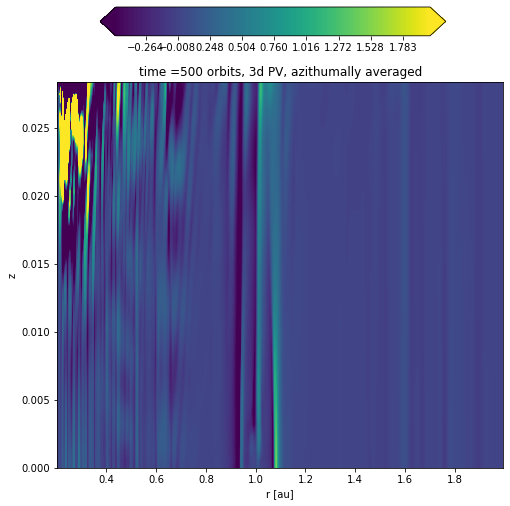

In [4]:
#r,z - PV image
vmin = -.5
vmax = 2
levels = np.linspace(vmin,vmax,128)
R = (rad3d*np.sin(theta3d))[0,1:,33]
Z = (np.cos(theta3d)*rad3d)[0,0,1:]
fig, ax = plt.subplots(figsize=(8,8))
cp = ax.contourf(R,Z,(((pv_phi[:,:,:]-pv_phi_init[:,:,:])/pv_theta_init[:,:,:]).mean(axis=0)).T, levels=levels,extend='both')
#ax.set_xlim(0.2,2)(
ax.set_ylim(0,max(Z))
ax.set_ylabel('z')
ax.set_xlabel('r [au]')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3d PV, azithumally averaged')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
#plt.savefig('PV_3dimage_3mavg_rz.png',dpi = 300)

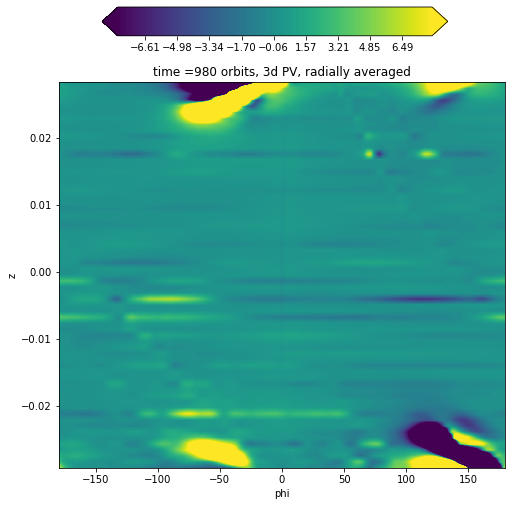

In [30]:
#phi,z - PV image
vmin = -8
vmax = 8
levels = np.linspace(vmin,vmax,128)
R = (rad3d*np.sin(theta3d))[0,1:,33]
Z = (np.cos(theta3d)*rad3d)[0,0,1:]
fig, ax = plt.subplots(figsize=(8,8))
cp = ax.contourf(fargo3d.phi[1:]*180/np.pi,Z,(((pv_rad[:,:,:]-pv_rad_init[:,:,:])/pv_rad_init[:,:,:]).mean(axis=1)).T, levels=levels,extend='both')
#ax.set_xlim(0.2,2)
#ax.set_ylim(0,max(Z))
ax.set_xlabel('phi')
ax.set_ylabel('z')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3d PV, radially averaged')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
#plt.savefig('PV_3dimage3mavg.png',dpi = 300)

In [22]:
print(np.loadtxt(path+'planet0.dat')[itime][-1])

0.9999720615737829
